---
# 📁 Hyun's Code collection (Decision Tree) 
---

### <h3 align="right">🥇 Authored by <strong>Hyun</strong></h3>

# ✏️ What is **Decision Tree**?

- Decision tree는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 ‘나무’와 같다고 해서 decision tree라 불림
- 뿌리의 끝마디가 Terminal node, 뿌리의 마디가 Root node, 중간 마디가 Intermediate node!, 끝 마디는 leaf node
- 의사결정나무는 분류(classification)와 회귀(regression) 모두 가능함  
- 데이터 전처리가 거의 필요하지 않다. Scaling 불필요
- 이해하고 해석하기 쉬우며, 사용하기 편하고 여러 용도로 사용가능하며, 성능도 우수!
- 대신 이상치에 민감
[참조 github blog](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)  
![](http://i.imgur.com/ZKDnzOB.png)

> Classification
 - 새로운 데이터가 특정 terminal node에 속한다는 정보를 확인한 뒤, 해당 terminal node에서 가장 빈도가 높은 범주에 새로운 데이터를 분류하게 됨. 
 - 운동경기 예시에 적용해보면 날씨는 맑은데 습도가 70을 넘는 날은 경기가 열리지 않을 거라고 예측함

> Regression
 - 회귀의 경우 해당 terminal node의 종속변수(y)의 평균을 예측값으로 반환함!
 - 이 때 예측값의 종류는 terminal node 개수와 일치합니다. 
 - 만약 terminal node 수가 3개뿐이라면 새로운 데이터가 100개, 아니 1000개가 주어진다고 해도 의사결정나무는 딱 3종류의 답만을 출력하게 됨

> [DT의 공간 분할 법](http://i.imgur.com/THaJKeR.png)
- 이런 식으로 공간을 나누는 것!

## 🔎 What criteria do Decision Tree divide the area by?

- Decision tree는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행
- 순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)이라 함
- 순도를 계산하는 3가지 방법
 > Entropy  
  : entropy 감소 = 불확실설 감소 = 순도 증가 = 정보획득  
  : $H_i = -\sum_{k=1}^nP_{i,k}log_2(P_{i,k})$  

 > Gini Index  
  : $G_i = 1-\sum_{k=1}^np_{i,k}^2$  
    $p_{i,k}$는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율  

 > Misclassification error  
  : 미분이 불가능해서 잘 안 쓰임
- Gini Index vs Entropy?
  - 실제로 큰 차이 없다.
  - Gini index가 계산이 좀 더 빨라서 기본값으로 좋음
  - Gini index보다 entropy가 조금 더 균형 잡힌 트리 생성

## 🔎 Decision Tree Training Algorithm

 - 크게 2가지: 재귀적 분기 & 가지치기 
 > 재귀적 분기(recursive partitioning)
  - 한 변수 기준으로 정렬한다. 
  - 그 변수에 대해 가능한 모든 분기점에 대해 Entropy/Gini Index를 구해 분기 전과 비교해 정보획득을 조사함
  - 이후 분기 지점을 두번째 레코드로 두고 처음 두 개 레코드와 나머지 레코드 간의 entropy를 계산한 뒤 정보획득을 계산
  - 이렇게 순차적으로 계산한 뒤, 이번엔 다른 변수을 기준으로 정렬하고 다시 같은 작업을 반복합니다. 
  - 모든 경우의 수 가운데 정보획득이 가장 큰 변수와 그 지점을 택해 첫번째 분기를 하게 됩니다. 
  - 이후 또 같은 작업을 반복해 두번째, 세번째… 이렇게 분기를 계속 해 나가는 과정이 바로 의사결정나무의 학습이다!!!

 > 가지치기(pruning)
  - Full tree: 모든 terminal node의 순도가 100%인 상태
  - Full tree를 생성한 뒤 적절한 수준에서 terminal node를 결합해주어 overfitting을 방지해주는 방법
  - cho-squared 검정 등을 사용하여 순도가 올라간 게 우연히 향상된 것인지 추정한다.
  - p-값이 임곗값보다 높으면 순도 향상이 우연에 의한 것일 수 있다고 본다.

[Entropy Calculation example](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

## 🔎 Cost Function (CART)

> Classification
- $J(K,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
 - $G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도
 - $m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수

> Regression  
- $J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$
  - $MSE_{node} = \sum_{i \in node}y^{(i)}$
  - $\hat{y}_{node} = \frac{1}{m_{node}}\sum_{i \in node}y^{(i)}$

# ✏️ Methods and Examples

## 📔 Basic Methods

- **DecisionTreeClassifier( )** : 기본 DT 모델
  - max_depth: 최대 깊이
  - min_samples_split: 분할되기 위해 node가 가질 최소 샘플 수
  - min_samples_leaf: leaf node가 가질 최소 샘플 수
  - min_weight_fraction_leaf: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
  - max_leaf_nodes: leaf node의 최대 수
  - max_features: 분할에 사용할 특성의 최대 수

## 📔 Examples

In [ ]:
## DT 예시 1
# 모델 만들어주기
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1, max_depth=50)
model

# fitting 시키기
model.fit(x_train,y_train_re)
model.fit(x_train,y_train_ca)
model.fit(x_train,y_train)

# predict하기
model.predict(x_test)

Accuracy: 0.98


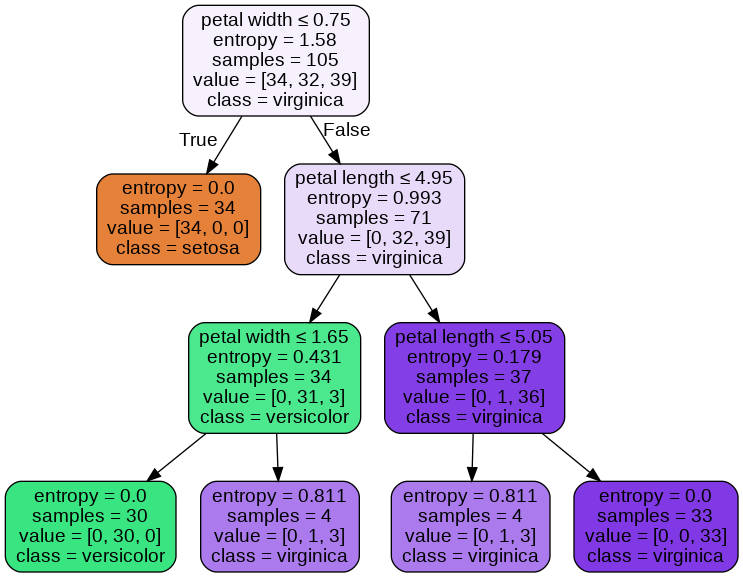

In [ ]:
## DT 예시 2
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
### DT 예시 3
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')